# Car Price Prediction Using Linear Regression
# ****************************************************

### Import required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
car_data=pd.read_csv('car data.csv')

In [4]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

### Handling Categorical Features using Mannually and  One Hot Encoding



#### Mannual method

In [8]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':'1','CNG':'2'}},inplace=True)

#### Encoding

In [9]:
car_data=pd.get_dummies(car_data,columns=['Seller_Type','Transmission'],drop_first=True)

In [10]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


C:\Users\aksha\AppData\Local\Temp\ipykernel_10484\2457535000.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(),annot=True)


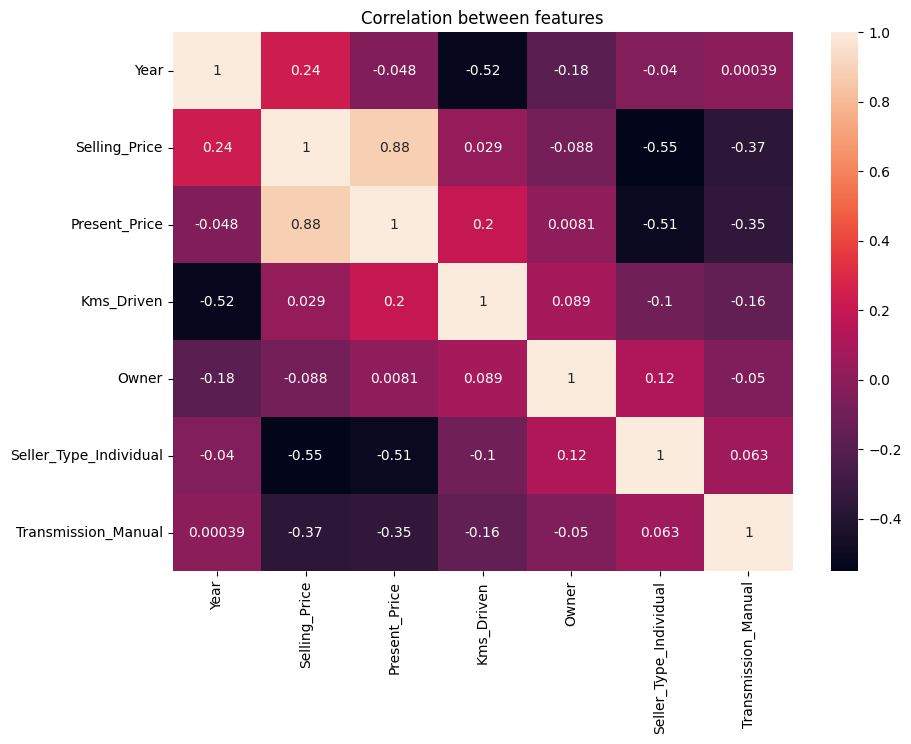

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(),annot=True)
plt.title("Correlation between features")
plt.show()

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

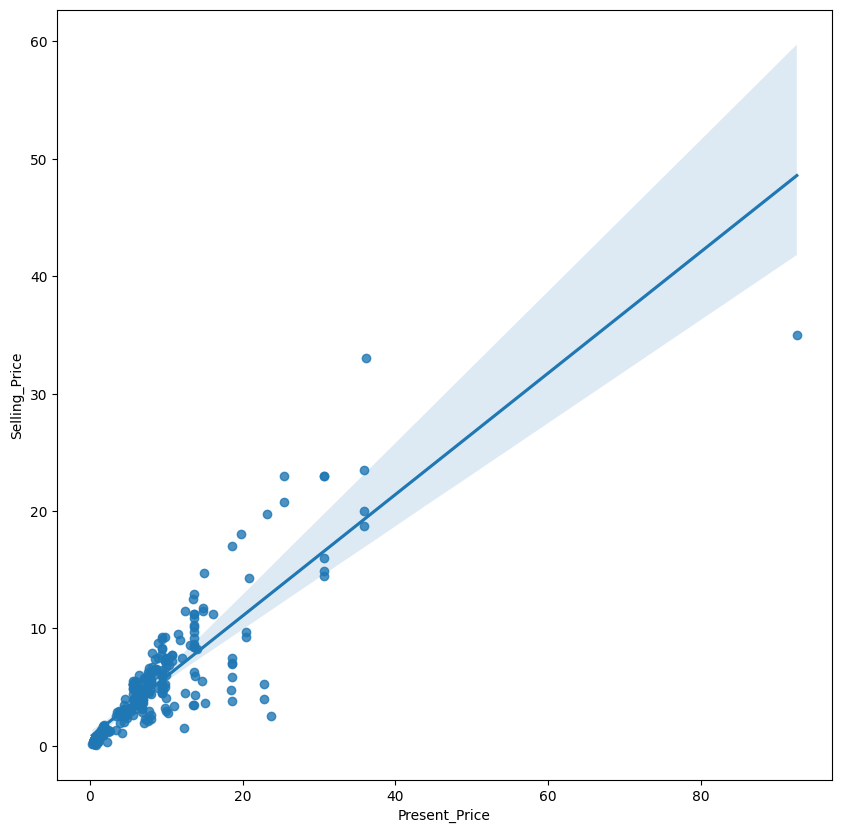

In [12]:
plt.figure(figsize=(10,10))
sns.regplot(x='Present_Price',y='Selling_Price',data=car_data)

In [13]:
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)#regressor variable
y=car_data['Selling_Price']#response variable

In [14]:
print(X.shape)
print(y.shape)

(301, 7)
(301,)


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
print(X.shape)
print(y.shape)

(301, 7)
(301,)


In [17]:
model=LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
pred=model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
print("MAE",(metrics.mean_absolute_error(pred,y_test)))
print("MSE",(metrics.mean_squared_error(pred,y_test)))
print("R2 score",(metrics.r2_score(pred,y_test)))

MAE 1.2581404706471302
MSE 3.4932860262264396
R2 score 0.8294933369777481


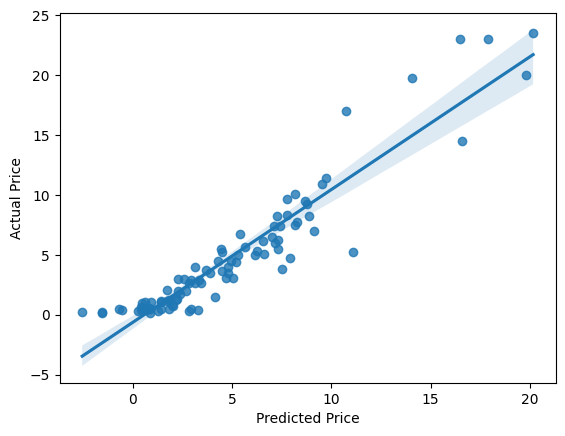

In [29]:
sns.regplot(x=pred,y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()